Importing relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Loading and preparing the data // sample

In [2]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())
      
# Load your dataset
data_frame = pd.read_csv(os.path.join(path_now,"Combined","train", "LAYING", "Subject_1.csv"), delimiter= ',')

accx_data = []
accy_data = []
accz_data = []

print(data_frame)

accx_data.append(data_frame['accx'].values)
accy_data.append(data_frame['accy'].values)
accz_data.append(data_frame['accz'].values)

np_accx = np.array(accx_data)
np_accy = np.array(accy_data)
np_accz = np.array(accz_data)

# Assume the columns 'accel_X', 'accel_Y', 'accel_Z' represent the raw accelerometer data
# X = data[['accx', 'accy', 'accz']]  # Features (adjust column names as necessary)
# y = data['LAYING']  # Target variable


          accx      accy      accz
0     0.181141  0.787813  0.581194
1     0.180389  0.788230  0.584017
2     0.184572  0.788880  0.580620
3     0.187104  0.788494  0.574279
4     0.186461  0.786544  0.570184
...        ...       ...       ...
3195  0.117154  0.937592 -0.346806
3196  0.119710  0.937131 -0.346094
3197  0.109197  0.937901 -0.344062
3198  0.100659  0.937448 -0.344856
3199  0.104422  0.938384 -0.345324

[3200 rows x 3 columns]


In [3]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs = []
# Load your dataset
action_types = ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
csv_directory = []
for action in action_types:
    csv_directory = csv_directory + [os.path.join(path_now,"Combined","train", action)]

# print(csv_directory[0])
action_freq = [0,0,0,0,0,0]

for i in range(6):
    sum_freq = 0
    for filename in os.listdir(csv_directory[i]):
        filepath = os.path.join(csv_directory[i], filename)
        print(filepath)
        # Read the CSV file
        df = pd.read_csv(filepath, delimiter=',')
        # print(df)
        # Append the DataFrame to the list
        dfs.append(df)

        # Optionally, print the filename to confirm processing
        print(f"Processed: {filename}")
        print(len(df))
        sum_freq = sum_freq + len(df)

    # print(dfs.shape[0])
    action_freq[i] =  sum_freq



c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_1.csv
Processed: Subject_1.csv
3200
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_11.csv
Processed: Subject_11.csv
3648
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_14.csv
Processed: Subject_14.csv
3264
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_15.csv
Processed: Subject_15.csv
4608
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_16.csv
Processed: Subject_16.csv
4480
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_17.csv
Processed: Subject_17.csv
4544
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\trai

In [4]:
print(action_freq)

# Combine all DataFrames into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Check the result
print(combined_df.shape)  # Print the shape of the combined DataFrame
print(combined_df)  # Print the first few rows of the combined DataFrame


[90048, 87936, 82304, 78464, 68672, 63104]
(470528, 3)
            accx      accy      accz
0       0.181141  0.787813  0.581194
1       0.180389  0.788230  0.584017
2       0.184572  0.788880  0.580620
3       0.187104  0.788494  0.574279
4       0.186461  0.786544  0.570184
...          ...       ...       ...
470523  0.590225  0.001552 -0.096826
470524  0.518104 -0.181908 -0.148720
470525  0.514909 -0.311256 -0.150640
470526  0.568525 -0.315488 -0.172318
470527  0.690852 -0.275761 -0.250478

[470528 rows x 3 columns]


y train

In [5]:
y_label = []
for i in range(6):
    y_label = y_label + [action_types[i]] * action_freq[i]

# Create the DataFrame
df_y_label = pd.DataFrame({'y_train': y_label})

print(df_y_label)

                   y_train
0                   LAYING
1                   LAYING
2                   LAYING
3                   LAYING
4                   LAYING
...                    ...
470523  WALKING_DOWNSTAIRS
470524  WALKING_DOWNSTAIRS
470525  WALKING_DOWNSTAIRS
470526  WALKING_DOWNSTAIRS
470527  WALKING_DOWNSTAIRS

[470528 rows x 1 columns]


Train now !!! Decision Trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

# n = 8

# Without setting random_state
# clf1 = DecisionTreeClassifier(max_depth= n, random_state= 43)

clf1 = DecisionTreeClassifier(random_state= 43)
clf1.fit(combined_df, df_y_label)

# clf2 = DecisionTreeClassifier()
# clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=43)

Now, Test and Predict , but wait, we are using the Train Set

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00     90048
           SITTING       1.00      1.00      1.00     82304
          STANDING       1.00      1.00      1.00     87936
           WALKING       1.00      1.00      1.00     78464
WALKING_DOWNSTAIRS       1.00      1.00      1.00     63104
  WALKING_UPSTAIRS       1.00      1.00      1.00     68672

          accuracy                           1.00    470528
         macro avg       1.00      1.00      1.00    470528
      weighted avg       1.00      1.00      1.00    470528



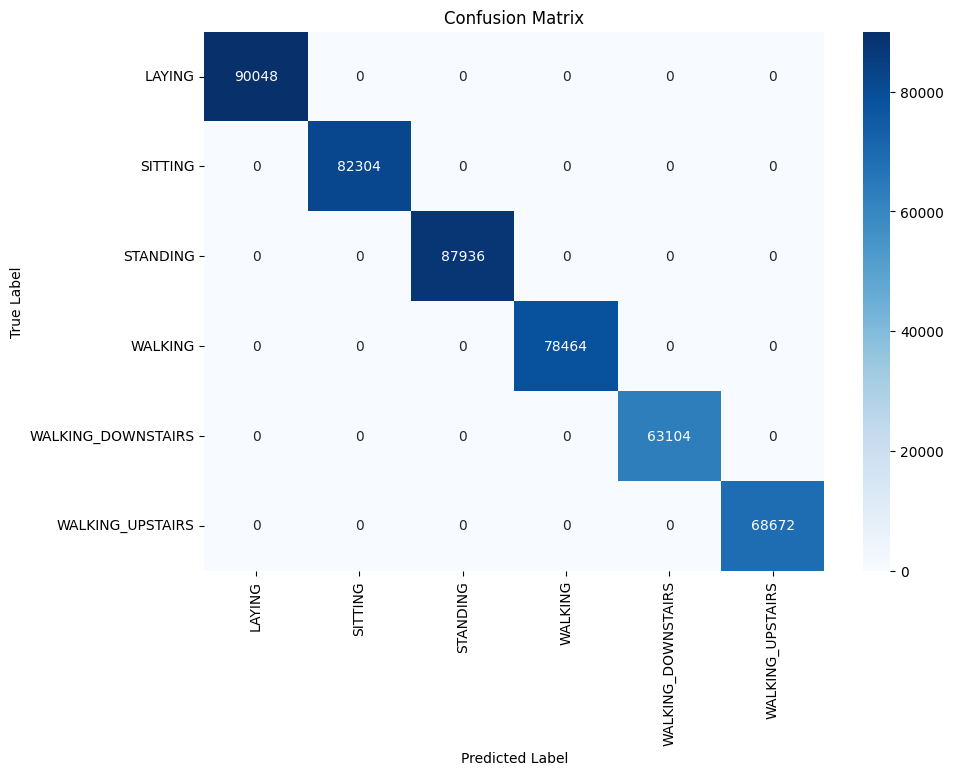

In [7]:
# Predict the test set
y_pred = clf1.predict(combined_df)

# Calculate accuracy
accuracy = accuracy_score(df_y_label, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label, y_pred, average='weighted')
recall = recall_score(df_y_label, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Making of Test Samples

In [32]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs_test = []
# # Load your dataset
action_types = ['Laying', 'Standing', 'Sitting', 'walk', 'Climb_Up', 'Walking_Downstairs']
# csv_directory = []
# for action in action_types:
#     for i in range(6):
#         csv_directory = csv_directory + [os.path.join(path_now,"Task4", "Data_New","Data_New")] #,action+"_"+str(i+1))]

csv_directory = os.path.join(path_now,"Task4", "Data_New","Data_New")
print(len(csv_directory))
action_freq_test = []

sum_freq = []
for filename in os.listdir(csv_directory):
    print(filename)
    # print(csv_directory)
    filepath = os.path.join(csv_directory, filename)
    # print(filepath)
    # Read the CSV file
    df = pd.read_csv(filepath, delimiter=',')
    df = df.drop('TgF', axis = 1)
    df = df.drop('time', axis = 1)
    # print(df)
    df.columns = ['accx', 'accy', 'accz']
    # print(df)
    # Append the DataFrame to the list
    dfs_test.append(df)

    # Optionally, print the filename to confirm processing
    # print(f"Processed test: {filename}")
    # print(len(df))
    sum_freq = sum_freq + [len(df)]

 
print(sum_freq)

for i in range(0, len(sum_freq), 6):
    # Sum the current chunk of 6 elements and append the sum to the new list
    chunk_sum = sum(sum_freq[i:i+6])
    action_freq_test.append(chunk_sum)

print(action_freq_test)



106
Climb_Up_1.csv
Climb_Up_2.csv
Climb_Up_3.csv
Climb_Up_4.csv
Climb_Up_5.csv
Climb_Up_6.csv
Laying_1.csv
Laying_2.csv
Laying_3.csv
Laying_4.csv
Laying_5.csv
Laying_6.csv
Sitting_1.csv
Sitting_2.csv
Sitting_3.csv
Sitting_4.csv
Sitting_5.csv
Sitting_6.csv
Standing_1.csv
Standing_2.csv
Standing_3.csv
Standing_4.csv
Standing_5.csv
Standing_6.csv
Walking_Downstairs_1.csv
Walking_Downstairs_2.csv
Walking_Downstairs_3.csv
Walking_Downstairs_4.csv
Walking_Downstairs_5.csv
Walking_Downstairs_6.csv
walk_1.csv
walk_2.csv
walk_3.csv
walk_4.csv
walk_5.csv
walk_6.csv
[732, 769, 843, 730, 771, 779, 716, 1169, 964, 847, 622, 838, 1038, 909, 903, 868, 783, 769, 552, 726, 754, 654, 979, 979, 621, 642, 774, 614, 589, 657, 731, 719, 799, 633, 893, 921]
[4624, 5156, 5270, 4644, 3897, 4696]


In [24]:
print(action_freq_test)
print(sum(action_freq_test))
# Combine all DataFrames into one DataFrame
combined_df_test = pd.concat(dfs_test, ignore_index=True)

# Check the result
print(combined_df_test.shape)  # Print the shape of the combined DataFrame
print(combined_df_test)  # Print the first few rows of the combined DataFrame


[4624, 5156, 5270, 4644, 3897, 4696]
28287
(28287, 3)
         accx    accy    accz
0      0.9883 -0.0447  0.0562
1      0.9854 -0.0481  0.0501
2      0.9956 -0.0640  0.0007
3      1.0039 -0.0706 -0.0000
4      1.0130 -0.0623  0.0090
...       ...     ...     ...
28282  1.2234 -0.2779  0.0058
28283  1.1741 -0.1879  0.0178
28284  0.9345  0.0812  0.0816
28285  0.8160  0.0433  0.1530
28286  0.8697  0.0125  0.1740

[28287 rows x 3 columns]


In [29]:
new_action_types = ['WALKING_UPSTAIRS','LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING']

y_label_test = []
for i in range(6):
    y_label_test = y_label_test + [new_action_types[i]] * action_freq_test[i]

# Create the DataFrame
df_y_label_test = pd.DataFrame({'y_train': y_label_test})

print(df_y_label_test)

                y_train
0      WALKING_UPSTAIRS
1      WALKING_UPSTAIRS
2      WALKING_UPSTAIRS
3      WALKING_UPSTAIRS
4      WALKING_UPSTAIRS
...                 ...
28282           WALKING
28283           WALKING
28284           WALKING
28285           WALKING
28286           WALKING

[28287 rows x 1 columns]


In [30]:
file_path1 = 'output_X.csv'  # This will save the file in the current working directory
file_path2 = 'output_Y.csv'  # This will save the file in the current working directory

# Save the DataFrame to a CSV file
combined_df_test.to_csv(file_path1, index=False)
df_y_label_test.to_csv(file_path2, index=False)

Now, Test and Predict , Using TEST SET 

combined_df_test --> x labels
df_y_label_test --> y label

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1673
Precision: 0.1598
Recall: 0.1673


C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.00      0.00      0.00      5156
           SITTING       0.00      0.00      0.00      5270
          STANDING       0.34      0.09      0.15      4644
           WALKING       0.24      0.45      0.31      4696
WALKING_DOWNSTAIRS       0.08      0.28      0.12      3897
  WALKING_UPSTAIRS       0.33      0.23      0.27      4624

          accuracy                           0.17     28287
         macro avg       0.16      0.18      0.14     28287
      weighted avg       0.16      0.17      0.14     28287



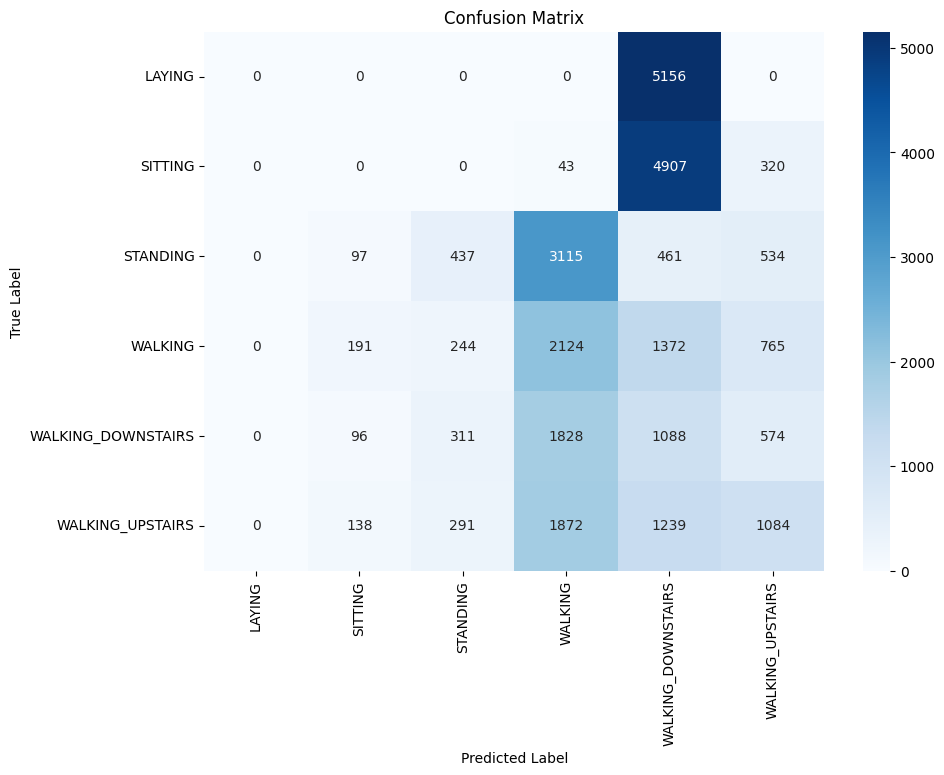

In [31]:
# Predict the test set
y_pred = clf1.predict(combined_df_test)

# Calculate accuracy
accuracy = accuracy_score(df_y_label_test, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label_test, y_pred, average='weighted')
recall = recall_score(df_y_label_test, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label_test, y_pred)

# Display the metrics
# print(f"depth: {n}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


depth vs accuracy, precision and recall

depth: 2   
Accuracy: 0.4613     
Precision: 0.3088   
Recall: 0.4613   

depth: 3   
Accuracy: 0.5332   
Precision: 0.4548   
Recall: 0.5332   

depth: 4   
Accuracy: 0.6030   
Precision: 0.5938    
Recall: 0.6030   

depth: 5   
Accuracy: 0.6323   
Precision: 0.6263   
Recall: 0.6323    

depth: 6    
Accuracy: 0.6270    
Precision: 0.6271    
Recall: 0.6270    

depth: 7   
Accuracy: 0.6321   
Precision: 0.6364    
Recall: 0.6321    

depth: 8    
Accuracy: 0.6358    
Precision: 0.6389    
Recall: 0.6358    


